## XGBoost
+ 트리 기반의 앙상블 기법
+ 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
+ GBM 기반이지만, 수행시간과 과적합 문제를 해결
+ 병렬 CPU 환경에서 빠르게 학습 가능
+ Random Forest보다 하이퍼 파라미터 세팅에 민감  
    => learning_rate, max_depth, n_estimators, scale_pos_weight 튜닝 추천

In [20]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stopping':100
}
num_boost_round = 500
early_stopping_rounds = 100
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, 
                      num_boost_round=num_boost_round,
                      early_stopping_rounds=early_stopping_rounds,
                      evals=evals)

[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60771	test-logloss:0.62094
[1]	train-logloss:0.53949	test-logloss:0.56012
[2]	train-logloss:0.48241	test-logloss:0.50998
[3]	train-logloss:0.43398	test-logloss:0.46432
[4]	train-logloss:0.38960	test-logloss:0.42593
[5]	train-logloss:0.35179	test-logloss:0.39364
[6]	train-logloss:0.31942	test-logloss:0.36767
[7]	train-logloss:0.28991	test-logloss:0.34266
[8]	train-logloss:0.26405	test-logloss:0.32059
[9]	train-logloss:0.24042	test-logloss:0.30121
[10]	train-logloss:0.22080	test-logloss:0.28562
[11]	train-logloss:0.20268	test-logloss:0.27378
[12]	train-

In [23]:
import numpy as np
y_pred = xgb_model.predict(dtest)
print(np.round(y_pred[:10],3))

[0.961 0.62  0.999 0.    0.949 0.001 0.992 1.    1.    0.999]


In [24]:
preds = [1 if x > 0.5 else 0 for x in y_pred]

print(f' Accuracy : {accuracy_score(y_test, preds)}')
print(f'Precision : {precision_score(y_test, preds)}')
print(f'   Recall : {recall_score(y_test, preds)}')

 Accuracy : 0.956140350877193
Precision : 0.9705882352941176
   Recall : 0.9565217391304348


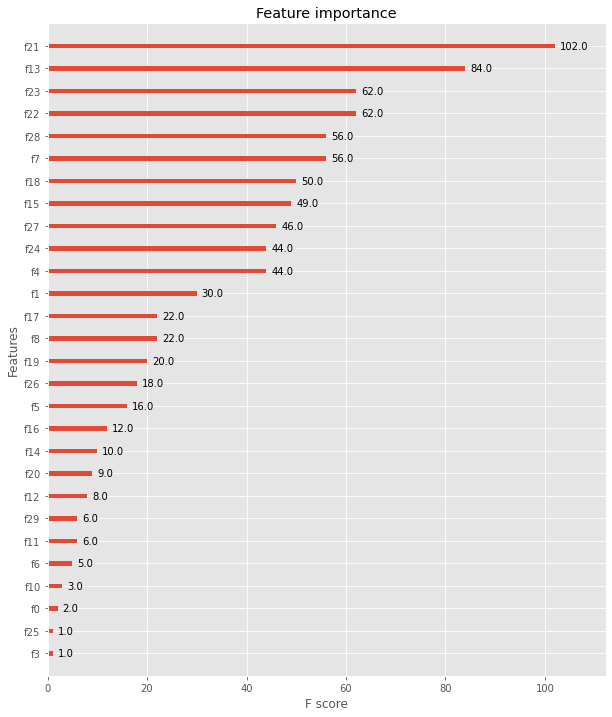

In [25]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

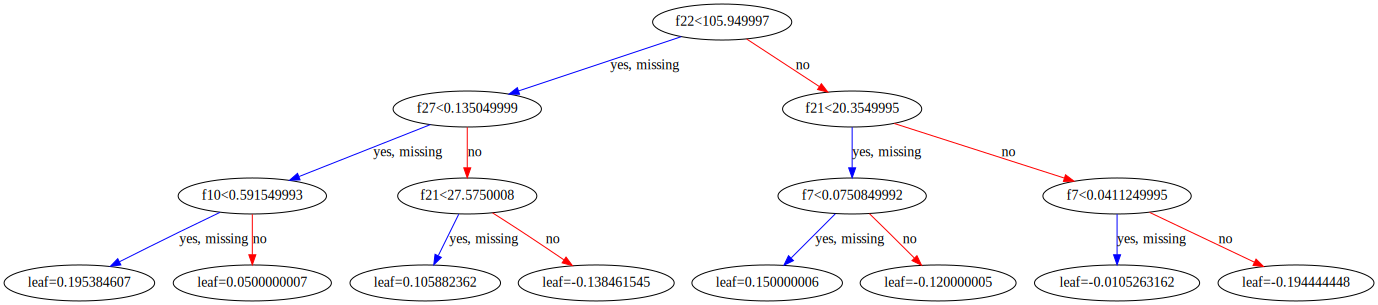

In [26]:
xgb.to_graphviz(xgb_model)


## XGBClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습데이터 점수 : 1.0
평가데이터 점수 : 0.9666666666666667
교차검증 점수 : 0.96


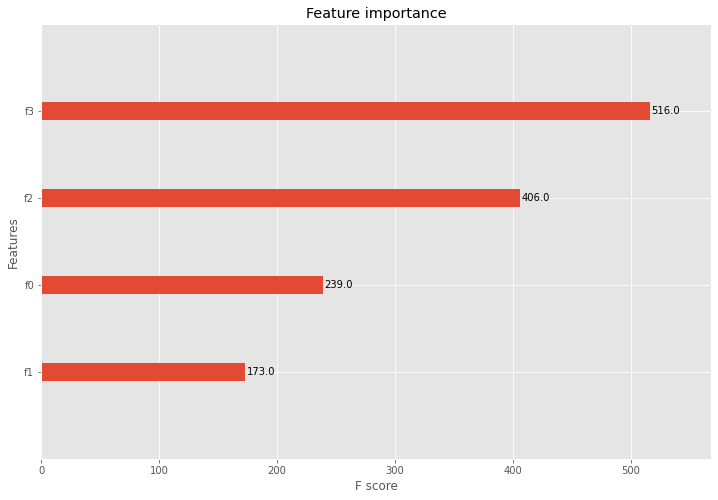

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax);

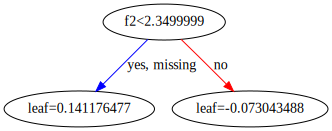

In [29]:
xgb.to_graphviz(model, figsize=(12,8))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=2)

model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습데이터 점수 : 1.0
평가데이터 점수 : 0.9444444444444444
교차검증 점수 : 0.9666666666666666


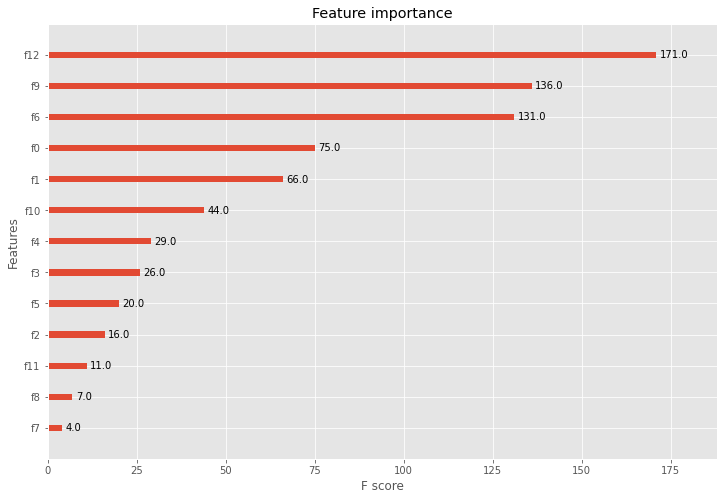

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax);

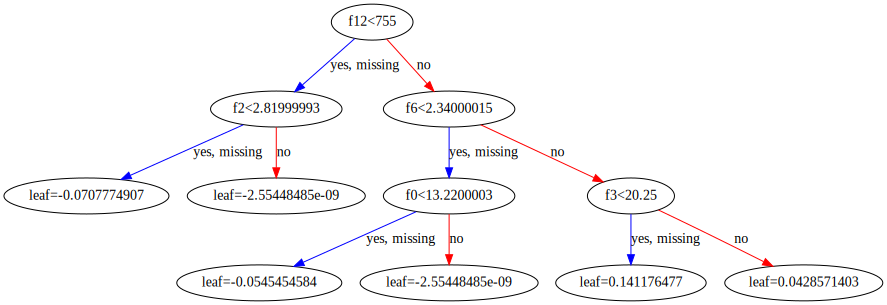

In [32]:
xgb.to_graphviz(model)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2)

model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0

[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0

[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습데이터 점수 : 1.0
평가데이터 점수 : 0.956140350877193
교차검증 점수 : 0.9771616541353385


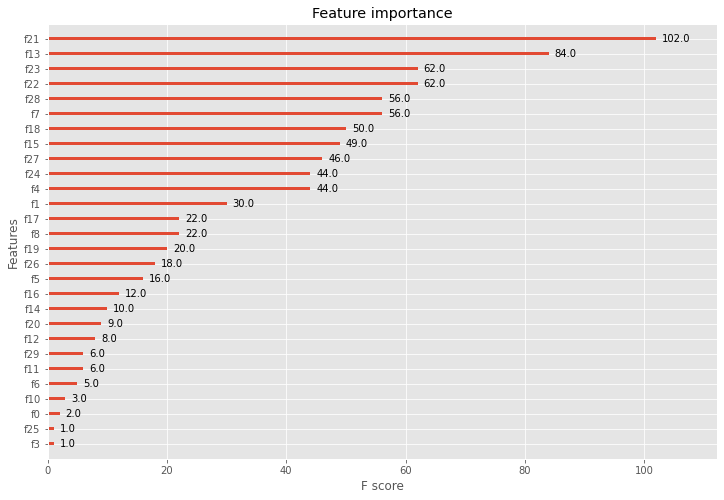

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax);

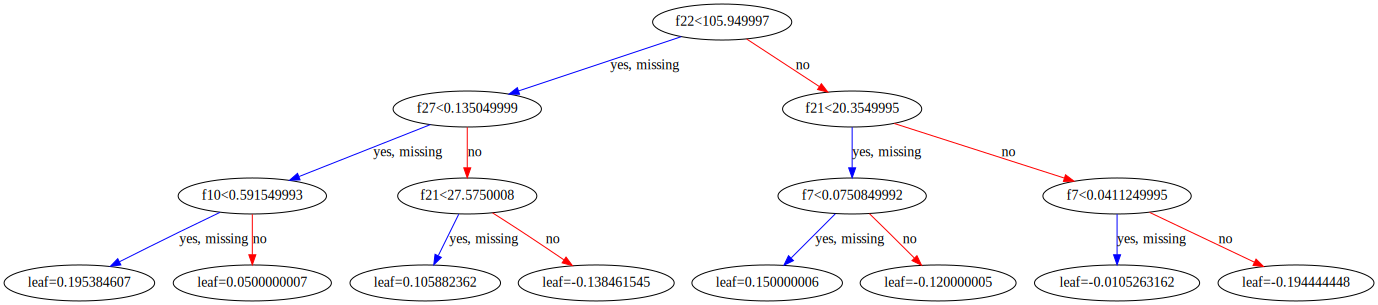

In [35]:
xgb.to_graphviz(model)

## XGBRegressor

In [36]:
boston = load_boston()
diabetes = load_diabetes()

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [37]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=2)

model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3,
                     objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

학습데이터 점수 : 0.9981485336256091
평가데이터 점수 : 0.9057536191439275
교차검증 점수 : 0.8271960479518368


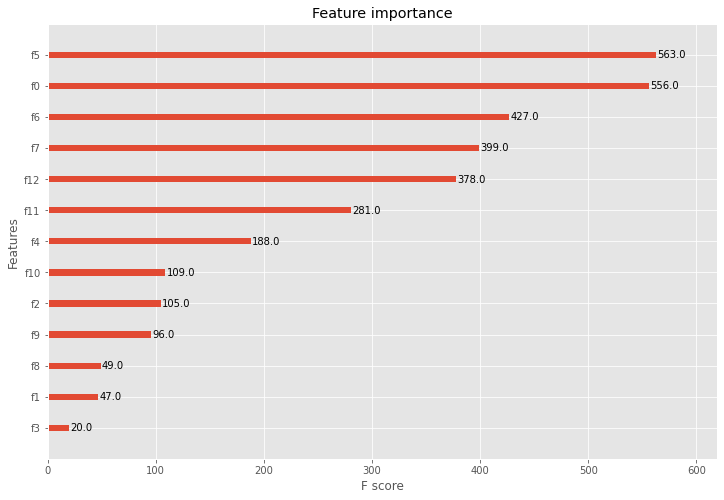

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax);

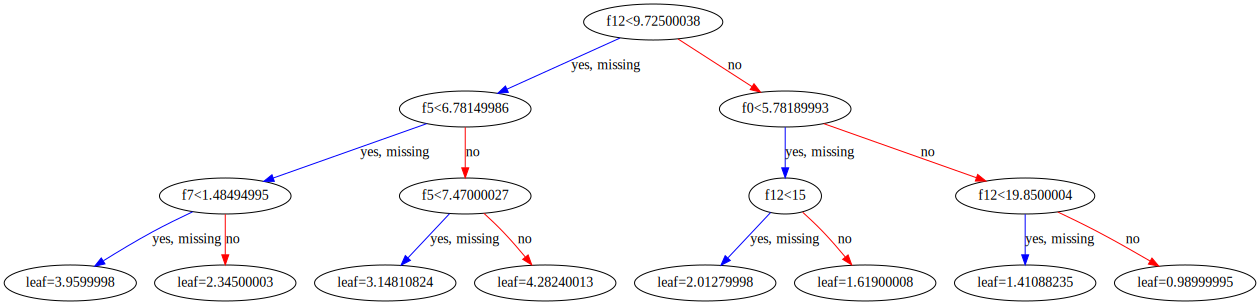

In [39]:
xgb.to_graphviz(model)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=2)

model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3,
                     objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

학습데이터 점수 : 0.9873078960285526
평가데이터 점수 : 0.18288891549511455
교차검증 점수 : 0.8271960479518368


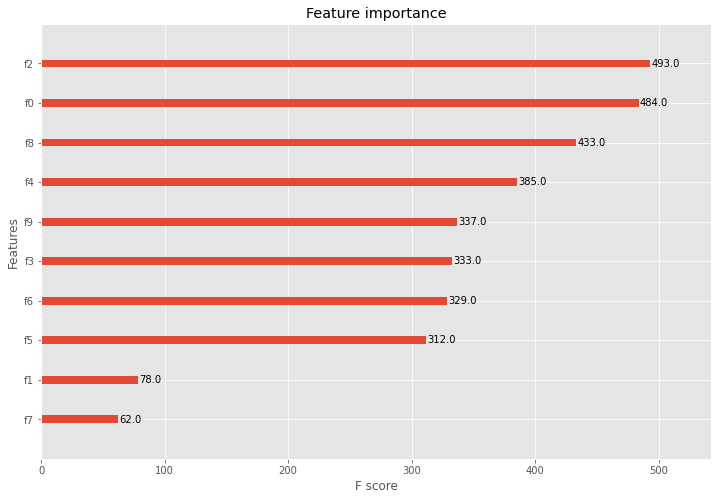

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax);

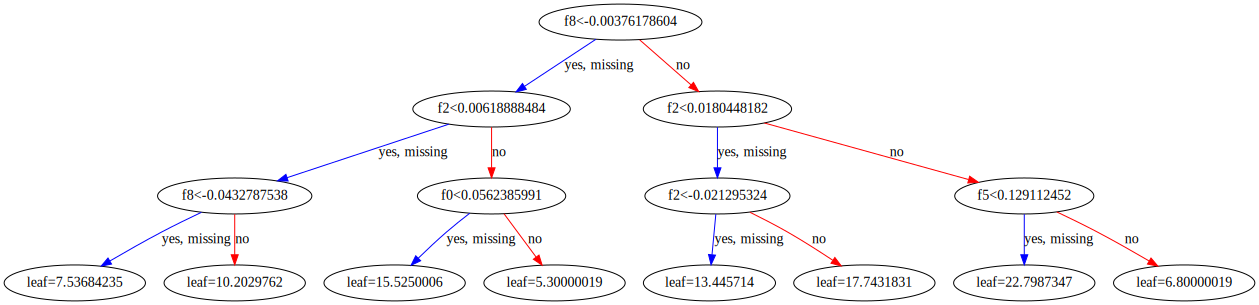

In [42]:
xgb.to_graphviz(model)

## LightGBM
+ 빠른 학습과 예측시간, 적은 메모리사용
+ 범주형 특징의 자동 변환과 최적 분할

In [43]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

model = LGBMClassifier(n_estimators=500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, 
          early_stopping_rounds=early_stopping_rounds, 
          eval_metric='logloss', 
          eval_set=eval_set, 
          verbose=True)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.940271
[2]	valid_0's multi_logloss: 0.799469
[3]	valid_0's multi_logloss: 0.690787
[4]	valid_0's multi_logloss: 0.597835
[5]	valid_0's multi_logloss: 0.524199
[6]	valid_0's multi_logloss: 0.462762
[7]	valid_0's multi_logloss: 0.40711
[8]	valid_0's multi_logloss: 0.362366
[9]	valid_0's multi_logloss: 0.323198
[10]	valid_0's multi_logloss: 0.290757
[11]	valid_0's multi_logloss: 0.261281
[12]	valid_0's multi_logloss: 0.238954
[13]	valid_0's multi_logloss: 0.215298
[14]	valid_0's multi_logloss: 0.198987
[15]	valid_0's multi_logloss: 0.184324
[16]	valid_0's multi_logloss: 0.167804
[17]	valid_0's multi_logloss: 0.157741
[18]	valid_0's multi_logloss: 0.146388
[19]	valid_0's multi_logloss: 0.138908
[20]	valid_0's multi_logloss: 0.130225
[21]	valid_0's multi_logloss: 0.121251
[22]	valid_0's multi_logloss: 0.116665
[23]	valid_0's multi_logloss: 0.108335
[24]	valid_0's multi_logloss: 0.105087
[25]	valid_0's multi_logloss: 0.0996825
[26]	valid_0's multi_logloss: 0.09

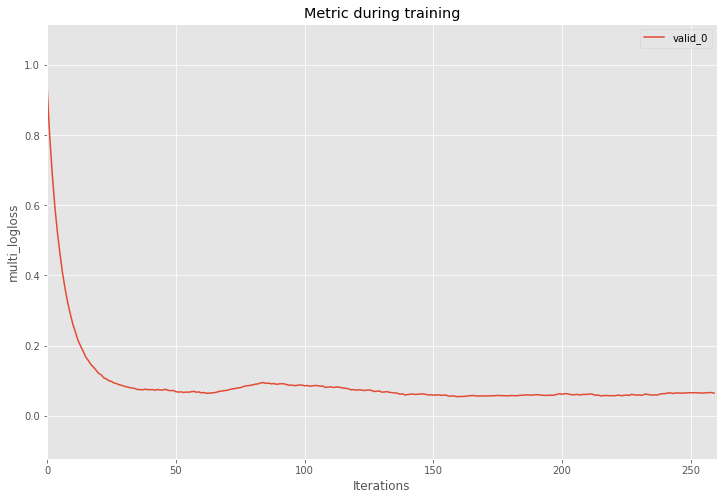

In [45]:
plot_metric(model, figsize=(12,8));

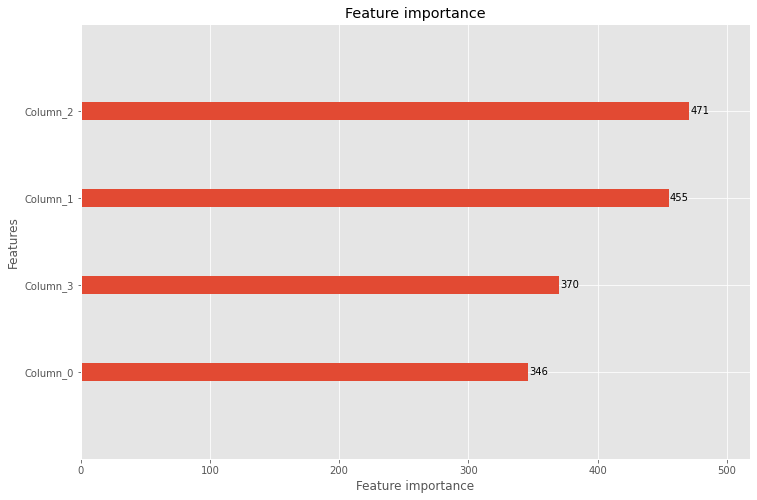

In [46]:
plot_importance(model, figsize=(12,8));

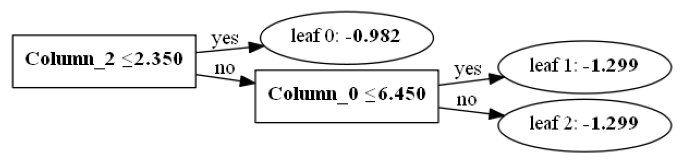

In [47]:
plot_tree(model, figsize=(12,8));

In [48]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=2)

model = LGBMClassifier(n_estimators=500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, 
          early_stopping_rounds=early_stopping_rounds, 
          eval_metric='logloss', 
          eval_set=eval_set, 
          verbose=True)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.0042
[2]	valid_0's multi_logloss: 0.896411
[3]	valid_0's multi_logloss: 0.803002
[4]	valid_0's multi_logloss: 0.719775
[5]	valid_0's multi_logloss: 0.652819
[6]	valid_0's multi_logloss: 0.593947
[7]	valid_0's multi_logloss: 0.539511
[8]	valid_0's multi_logloss: 0.493146
[9]	valid_0's multi_logloss: 0.450634
[10]	valid_0's multi_logloss: 0.4073
[11]	valid_0's multi_logloss: 0.371823
[12]	valid_0's multi_logloss: 0.340285
[13]	valid_0's multi_logloss: 0.313126
[14]	valid_0's multi_logloss: 0.293059
[15]	valid_0's multi_logloss: 0.26994
[16]	valid_0's multi_logloss: 0.247958
[17]	valid_0's multi_logloss: 0.228968
[18]	valid_0's multi_logloss: 0.213127
[19]	valid_0's multi_logloss: 0.198617
[20]	valid_0's multi_logloss: 0.183499
[21]	valid_0's multi_logloss: 0.167684
[22]	valid_0's multi_logloss: 0.154895
[23]	valid_0's multi_logloss: 0.146094
[24]	valid_0's multi_logloss: 0.133815
[25]	valid_0's multi_logloss: 0.126244
[26]	valid_0's multi_logloss: 0.11671
[

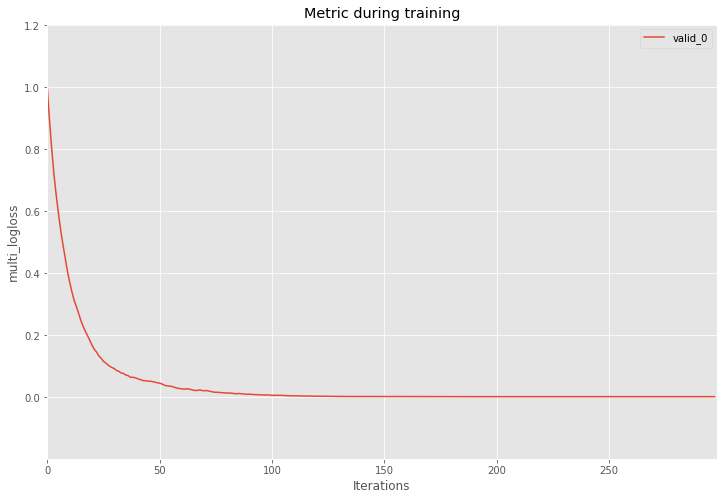

In [49]:
plot_metric(model, figsize=(12,8));

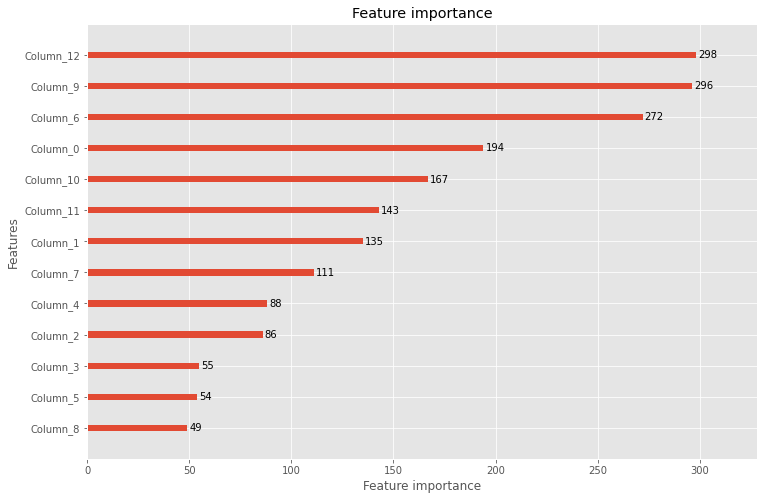

In [50]:
plot_importance(model, figsize=(12,8));

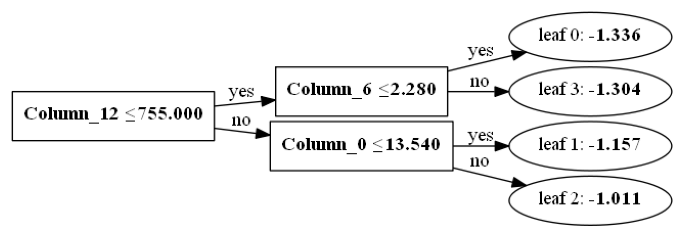

In [51]:
plot_tree(model, figsize=(12,8));

In [52]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2)

model = LGBMClassifier(n_estimators=500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, 
          early_stopping_rounds=early_stopping_rounds, 
          eval_metric='logloss', 
          eval_set=eval_set, 
          verbose=True)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.595058
[2]	valid_0's binary_logloss: 0.531088
[3]	valid_0's binary_logloss: 0.480298
[4]	valid_0's binary_logloss: 0.439919
[5]	valid_0's binary_logloss: 0.404514
[6]	valid_0's binary_logloss: 0.374295
[7]	valid_0's binary_logloss: 0.349482
[8]	valid_0's binary_logloss: 0.327203
[9]	valid_0's binary_logloss: 0.30749
[10]	valid_0's binary_logloss: 0.2919
[11]	valid_0's binary_logloss: 0.276769
[12]	valid_0's binary_logloss: 0.264068
[13]	valid_0's binary_logloss: 0.250996
[14]	valid_0's binary_logloss: 0.242081
[15]	valid_0's binary_logloss: 0.233498
[16]	valid_0's binary_logloss: 0.223188
[17]	valid_0's binary_logloss: 0.216651
[18]	valid_0's binary_logloss: 0.20887
[19]	valid_0's binary_logloss: 0.204443
[20]	valid_0's binary_logloss: 0.198559
[21]	valid_0's binary_logloss: 0.195732
[22]	valid_0's binary_logloss: 0.192506
[23]	valid_0's binary_logloss: 0.18998
[24]	valid_0's binary_logloss: 0.187803
[25]	valid_0's binary_logloss: 0.184388
[26]	valid_0's

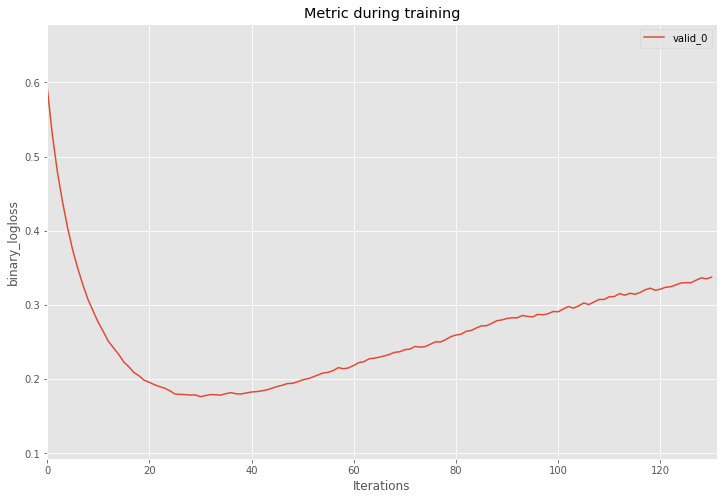

In [53]:
plot_metric(model, figsize=(12,8));

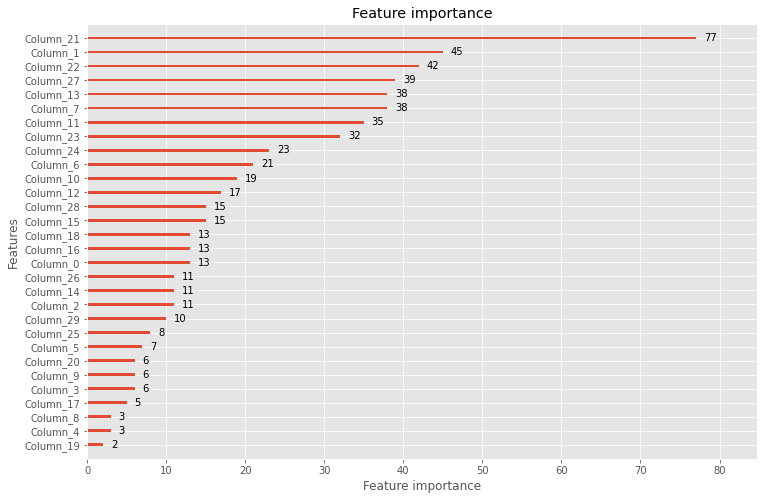

In [54]:
plot_importance(model, figsize=(12,8));

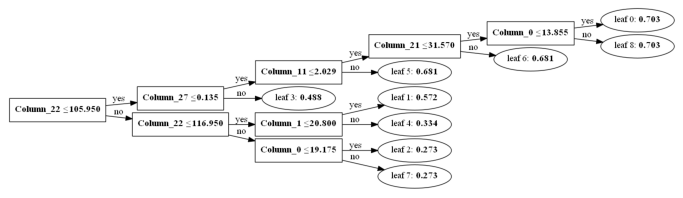

In [55]:
plot_tree(model, figsize=(12,8));

In [56]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=2)

model = LGBMRegressor(n_estimators=500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train,
          early_stopping_rounds=early_stopping_rounds,
          eval_metric='logloss',
          eval_set=eval_set,
          verbose=True)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 70.8274
[2]	valid_0's l2: 60.5105
[3]	valid_0's l2: 51.3374
[4]	valid_0's l2: 44.2184
[5]	valid_0's l2: 38.6191
[6]	valid_0's l2: 32.8272
[7]	valid_0's l2: 28.0351
[8]	valid_0's l2: 24.9704
[9]	valid_0's l2: 22.0171
[10]	valid_0's l2: 19.6704
[11]	valid_0's l2: 17.7175
[12]	valid_0's l2: 15.7942
[13]	valid_0's l2: 14.3902
[14]	valid_0's l2: 13.2534
[15]	valid_0's l2: 12.2944
[16]	valid_0's l2: 11.369
[17]	valid_0's l2: 10.5104
[18]	valid_0's l2: 10.1798
[19]	valid_0's l2: 9.33709
[20]	valid_0's l2: 9.2114
[21]	valid_0's l2: 8.71179
[22]	valid_0's l2: 8.32483
[23]	valid_0's l2: 8.27615
[24]	valid_0's l2: 8.028
[25]	valid_0's l2: 7.76778
[26]	valid_0's l2: 7.79897
[27]	valid_0's l2: 7.60464
[28]	valid_0's l2: 7.47983
[29]	valid_0's l2: 7.38527
[30]	valid_0's l2: 7.28987
[31]	valid_0's l2: 7.31846
[32]	valid_0's l2: 7.19876
[33]	valid_0's l2: 7.15778
[34]	valid_0's l2: 7.05705
[35]	valid_0's l2: 7.15219
[36]	valid_0's l2: 7.20101
[37]	valid_0's l2: 7.19975
[38]	valid_0's

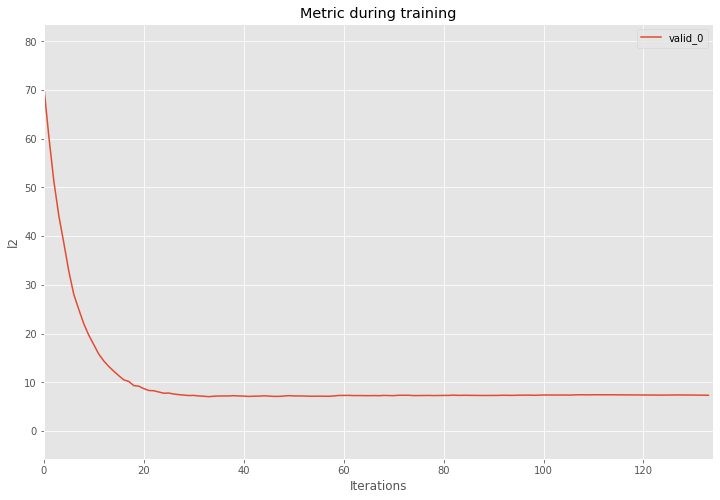

In [57]:
plot_metric(model, figsize=(12,8));

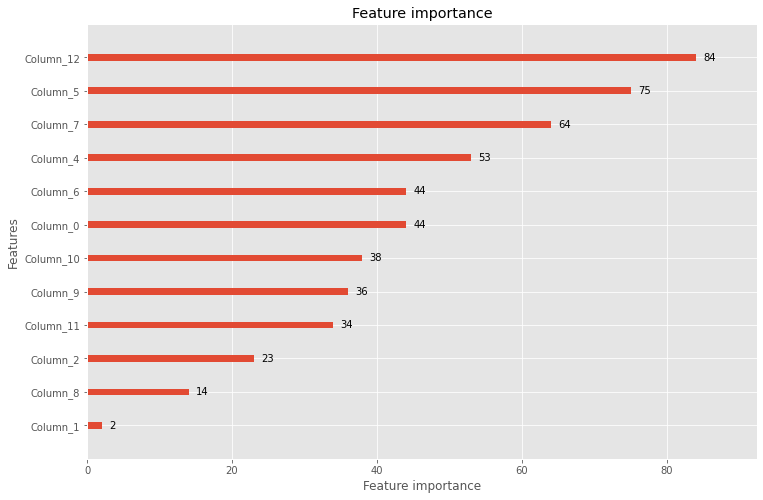

In [58]:
plot_importance(model, figsize=(12,8));

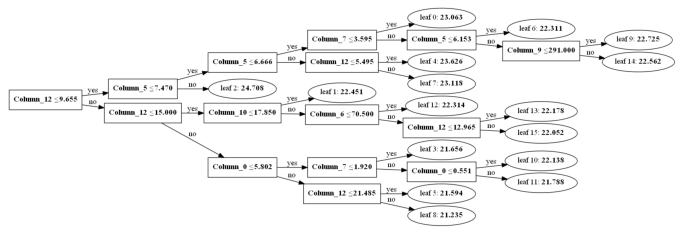

In [59]:
plot_tree(model, figsize=(12,8));

In [60]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=2)

model = LGBMRegressor(n_estimators=500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train,
          early_stopping_rounds=early_stopping_rounds,
          eval_metric='logloss',
          eval_set=eval_set,
          verbose=True)

y_pred = model.predict(X_test)
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target,
                           cv=10)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')
print('교차검증 점수 : {}'.format(cross_val['test_score'].mean()))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 5142
[2]	valid_0's l2: 4785.09
[3]	valid_0's l2: 4438.64
[4]	valid_0's l2: 4242.23
[5]	valid_0's l2: 4048.66
[6]	valid_0's l2: 3895.56
[7]	valid_0's l2: 3725.6
[8]	valid_0's l2: 3635.42
[9]	valid_0's l2: 3551.23
[10]	valid_0's l2: 3463.56
[11]	valid_0's l2: 3425.46
[12]	valid_0's l2: 3395.66
[13]	valid_0's l2: 3358.17
[14]	valid_0's l2: 3372.24
[15]	valid_0's l2: 3360.57
[16]	valid_0's l2: 3345.22
[17]	valid_0's l2: 3354.38
[18]	valid_0's l2: 3358.59
[19]	valid_0's l2: 3343.37
[20]	valid_0's l2: 3331.19
[21]	valid_0's l2: 3300.51
[22]	valid_0's l2: 3345.85
[23]	valid_0's l2: 3380.62
[24]	valid_0's l2: 3423.82
[25]	valid_0's l2: 3424.45
[26]	valid_0's l2: 3425.05
[27]	valid_0's l2: 3430.65
[28]	valid_0's l2: 3452.65
[29]	valid_0's l2: 3477.36
[30]	valid_0's l2: 3495.85
[31]	valid_0's l2: 3520.67
[32]	valid_0's l2: 3520.49
[33]	valid_0's l2: 3524.72
[34]	valid_0's l2: 3539.49
[35]	valid_0's l2: 3536.53
[36]	valid_0's l2: 3569.6
[37]	valid_0's l2: 3573.89
[38]	valid_0's 

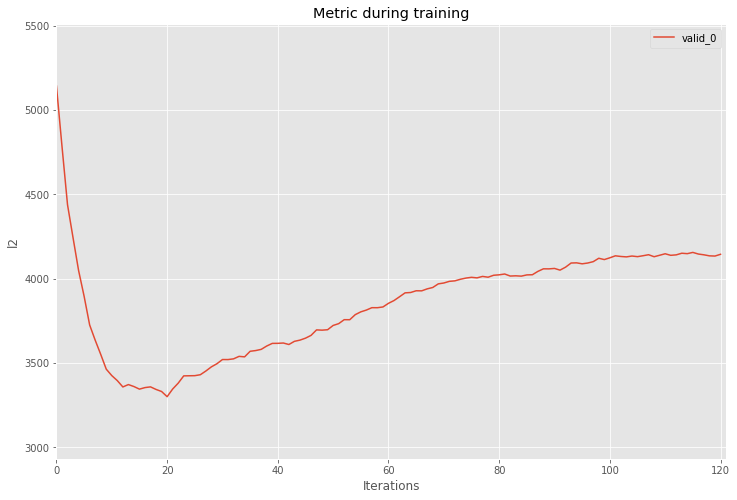

In [61]:
plot_metric(model, figsize=(12,8));

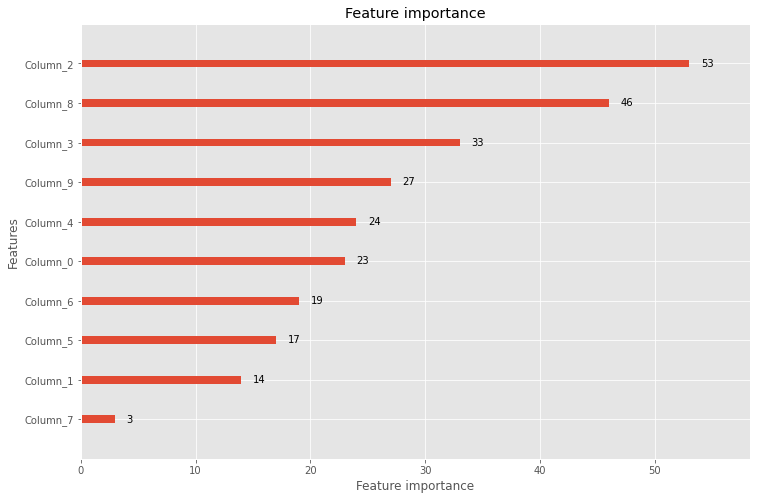

In [62]:
plot_importance(model, figsize=(12,8));

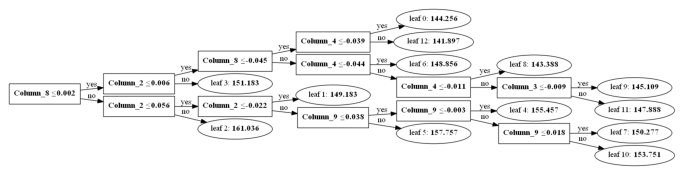

In [63]:
plot_tree(model, figsize=(12,8));